In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [81]:
menus = pd.read_csv('../data/menus.csv')

In [5]:
menus.head()

,date,name,restaurant,etudiant,doctorant,campus,visiteur,vegetarian
0,2022-01-03,Arrancini tomate mozarella\nsauce \n Légumes a...,Alpine,8.0,9.0,10.0,11.0,False
1,2022-01-03,Pad Thaï du Chef Noï\nSauté de légumes \ncébette,Alpine,10.5,11.0,11.5,12.5,False
2,2022-01-03,"Saucisse de Veau Suisse, sauce aux oignons\nCo...",Alpine,11.5,12.0,12.5,13.5,False
3,2022-01-03,"Gratin de rigatoni, crème de gorgonzola, champ...",Arcadie,5.5,6.5,7.0,8.0,False
4,2022-01-03,Mozzarella billes aux tomates séchées et câpre...,Arcadie,12.0,12.0,12.0,12.0,False


In [8]:
# Display basic information about the DataFrame
print("DataFrame Info:")
print(menus.info())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21250 entries, 0 to 21249
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        21250 non-null  object 
 1   name        21249 non-null  object 
 2   restaurant  21250 non-null  object 
 3   etudiant    18038 non-null  float64
 4   doctorant   17642 non-null  float64
 5   campus      17542 non-null  float64
 6   visiteur    19849 non-null  float64
 7   vegetarian  21250 non-null  bool   
dtypes: bool(1), float64(4), object(3)
memory usage: 1.2+ MB
None


In [9]:
# Summary statistics
print("\nSummary Statistics:")
print(menus.describe())



Summary Statistics:
           etudiant     doctorant        campus      visiteur
count  18038.000000  17642.000000  17542.000000  19849.000000
mean      10.423744     11.504200     11.897988     12.507411
std        3.815614      4.090794      3.968985      3.994251
min        0.000000      0.000000      0.000000      0.000000
25%        8.000000      9.000000      9.900000     10.000000
50%       10.000000     11.000000     12.000000     12.500000
75%       12.500000     13.500000     13.900000     14.900000
max       25.000000     25.000000     25.000000    122.000000


In [14]:
# Count the number of missing values in each column
missing_values = menus.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
date             0
name             1
restaurant       0
etudiant      3212
doctorant     3608
campus        3708
visiteur      1401
vegetarian       0
dtype: int64


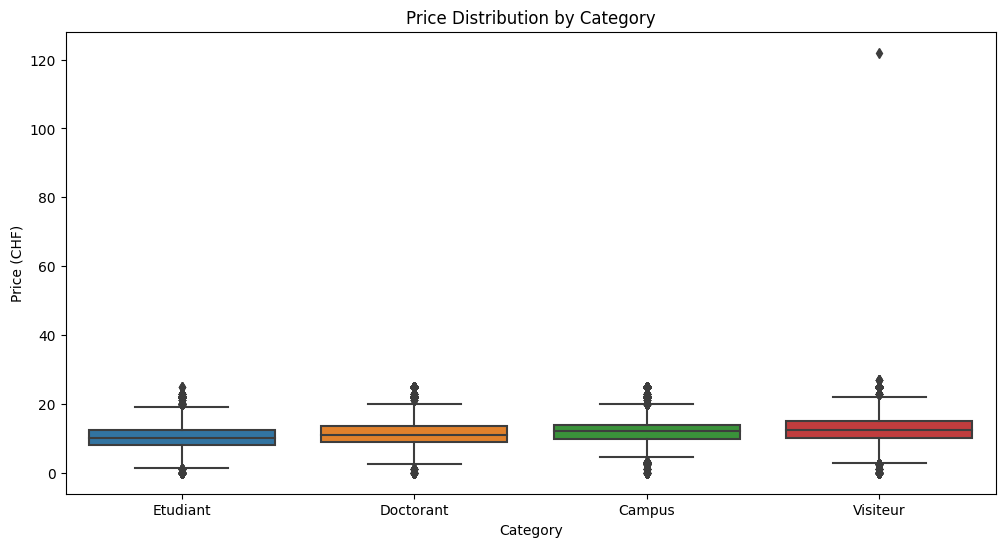

In [17]:
# Plot the distribution of prices for different categories
plt.figure(figsize=(12, 6))
sns.boxplot(data=menus[['etudiant', 'doctorant', 'campus', 'visiteur']])
plt.title("Price Distribution by Category")
plt.ylabel("Price (CHF)")
plt.xlabel("Category")
plt.xticks(ticks=range(4), labels=['Etudiant', 'Doctorant', 'Campus', 'Visiteur'])
plt.show()

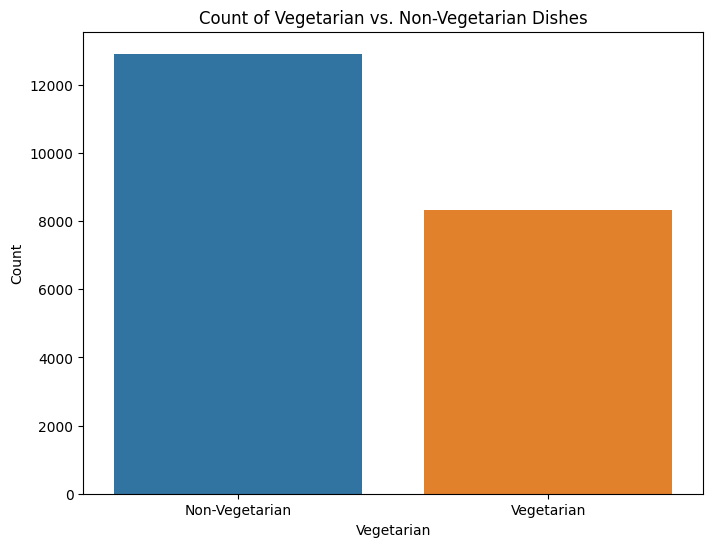

In [18]:
# Plot the number of vegetarian vs. non-vegetarian dishes
plt.figure(figsize=(8, 6))
sns.countplot(data=menus, x='vegetarian')
plt.title("Count of Vegetarian vs. Non-Vegetarian Dishes")
plt.xlabel("Vegetarian")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['Non-Vegetarian', 'Vegetarian'])
plt.show()


In [83]:
vegetarian_proportions

,date,vegetarian,date_numeric
0,2022-01-03,0.000000,1641168000000000000
1,2022-01-04,0.000000,1641254400000000000
2,2022-01-05,0.153846,1641340800000000000
3,2022-01-06,0.153846,1641427200000000000
4,2022-01-07,0.153846,1641513600000000000
...,...,...,...
521,2023-08-29,0.183333,1693267200000000000
522,2023-08-30,0.183333,1693353600000000000
523,2023-08-31,0.215385,1693440000000000000
524,2023-09-01,0.196721,1693526400000000000


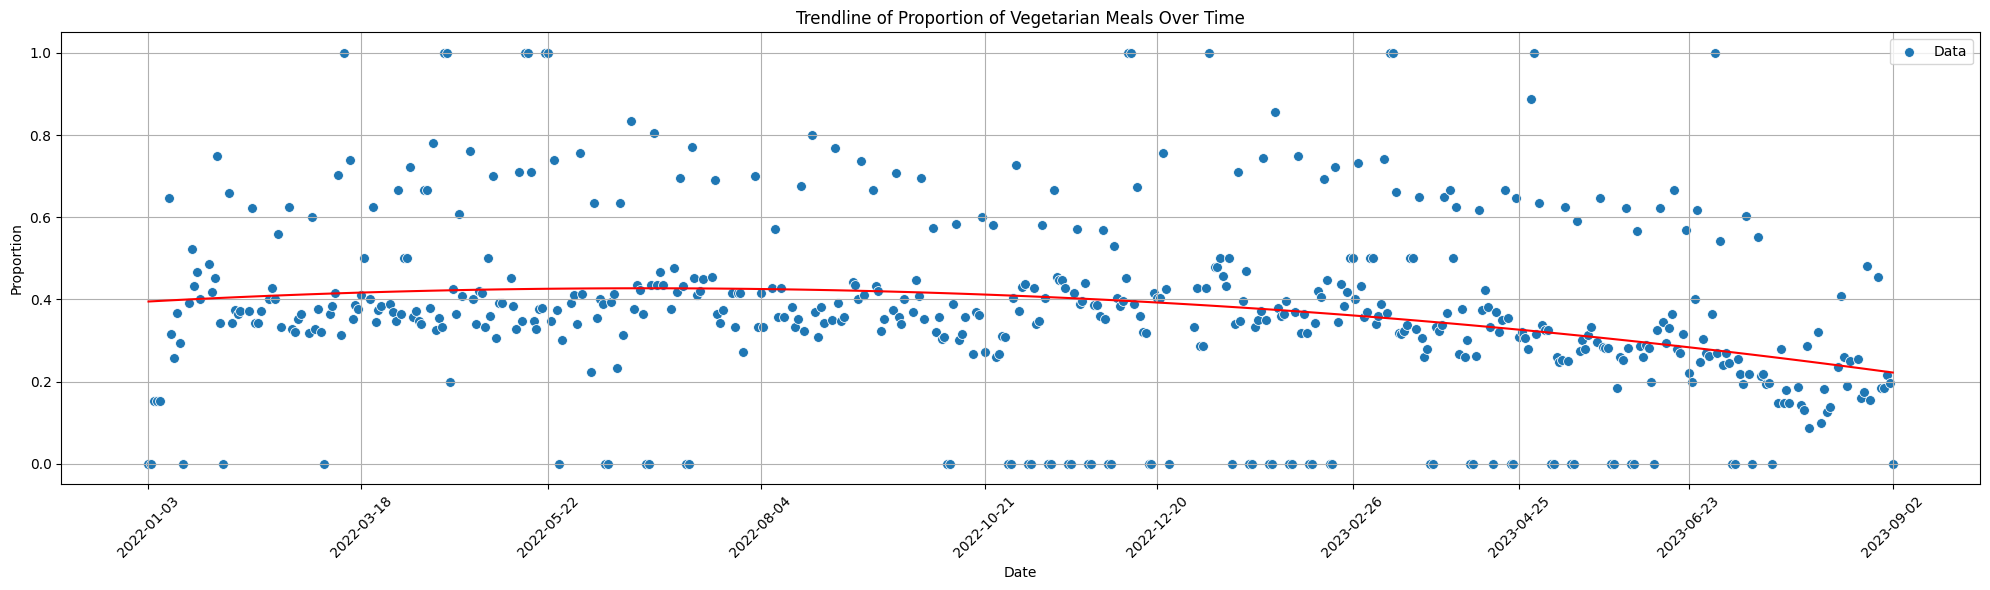

In [87]:
# Calculate the proportion of vegetarian meals for each date
menus_datetime = menus.copy()
menus_datetime['date'] = pd.to_datetime(menus_datetime['date'], format='%Y-%m-%d')
vegetarian_proportions = menus_datetime.groupby('date')['vegetarian'].mean().reset_index()

# Convert date to numeric values
vegetarian_proportions['date_numeric'] = pd.to_numeric(vegetarian_proportions['date'])

# Fit a polynomial regression model
coefficients = np.polyfit(vegetarian_proportions['date_numeric'], vegetarian_proportions['vegetarian'], 2)
poly = np.poly1d(coefficients)

# Create a regplot to visualize the trendline
plt.figure(figsize=(20, 6))
sns.scatterplot(data=vegetarian_proportions, x='date_numeric', y='vegetarian', s=50, label='Data')

# Create a smooth trendline using the polynomial model
x_values = np.linspace(vegetarian_proportions['date_numeric'].min(), vegetarian_proportions['date_numeric'].max(), 100)
y_values = poly(x_values)
plt.plot(x_values, y_values, color='red', label='Trendline')

plt.title("Trendline of Proportion of Vegetarian Meals Over Time")
plt.xlabel("Date")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.grid(True)

ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True, prune='both'))


# Select approximately 10 evenly spaced date indices
date_indices = np.linspace(0, len(vegetarian_proportions) - 1, num=10, dtype=int)
selected_dates = vegetarian_proportions['date'].iloc[date_indices].dt.strftime('%Y-%m-%d')

# Set x-ticks and corresponding labels
ax.set_xticks(vegetarian_proportions['date_numeric'].iloc[date_indices])
ax.set_xticklabels(selected_dates, rotation=45)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

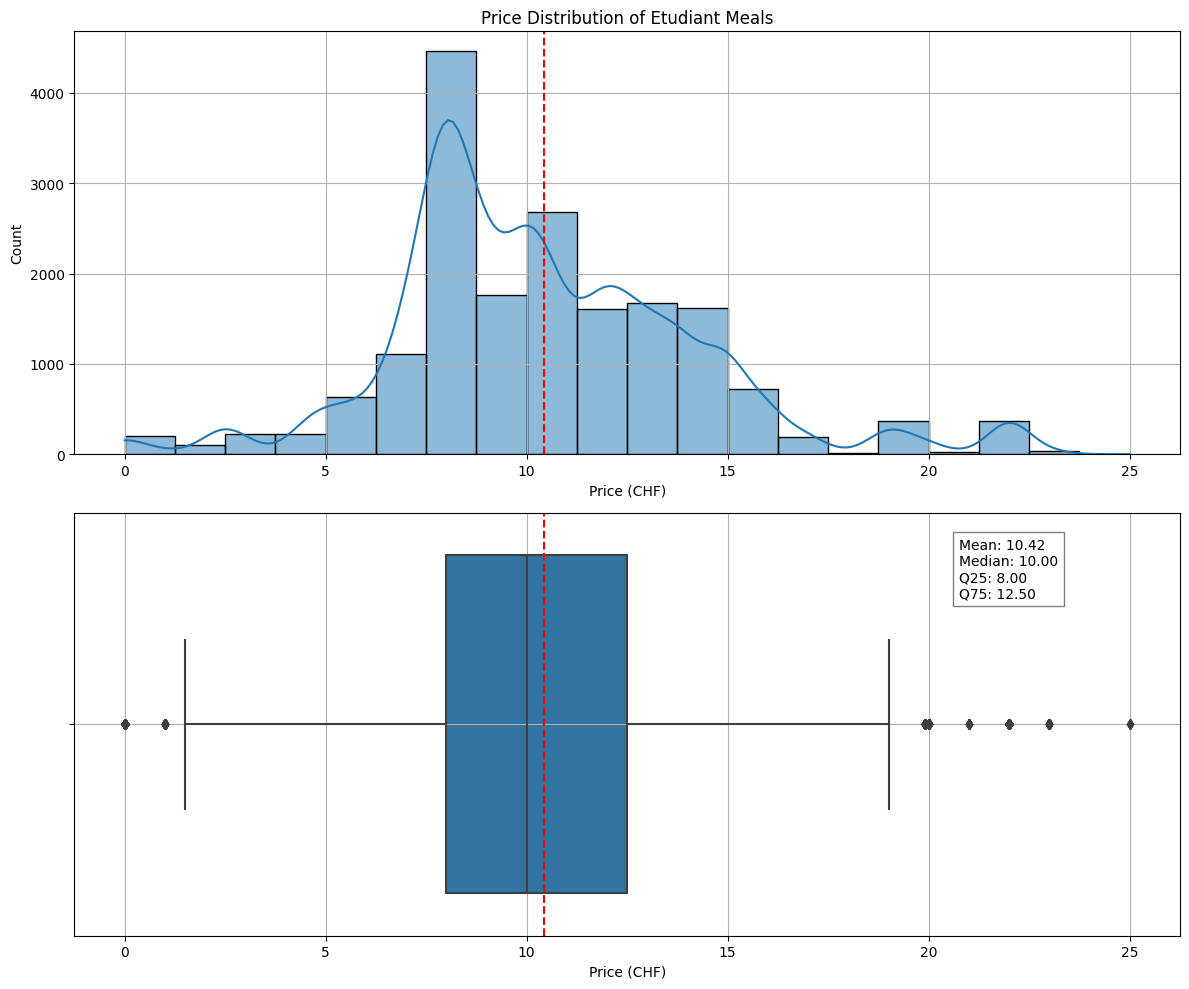

In [43]:
# Create a figure with subplots for the histogram and boxplot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=False)

# Calculate the statistics for etudiant meal prices
mean_etudiant_price = menus['etudiant'].mean()
median_etudiant_price = menus['etudiant'].median()
q25_etudiant_price = menus['etudiant'].quantile(0.25)
q75_etudiant_price = menus['etudiant'].quantile(0.75)

# Histogram for the price distribution of etudiant meals
sns.histplot(data=menus, x='etudiant', bins=20, kde=True, ax=ax1)
ax1.set_title("Price Distribution of Etudiant Meals")
ax1.set_ylabel("Count")
ax1.set_xlabel("Price (CHF)")
ax1.axvline(mean_etudiant_price, color='r', linestyle='--', label=f"Mean: {mean_etudiant_price:.2f}")
ax1.grid(True)

# Boxplot for the price distribution of etudiant meals
sns.boxplot(data=menus, x='etudiant', ax=ax2, orient='h')
ax2.set_xlabel("Price (CHF)")
ax2.axvline(mean_etudiant_price, color='r', linestyle='--', label=f"Mean: {mean_etudiant_price:.2f}")
statistics_text = f"Mean: {mean_etudiant_price:.2f}\nMedian: {median_etudiant_price:.2f}\nQ25: {q25_etudiant_price:.2f}\nQ75: {q75_etudiant_price:.2f}"
ax2.text(0.8, 0.8, statistics_text, transform=ax2.transAxes, bbox=dict(facecolor='white', alpha=0.5))
ax2.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

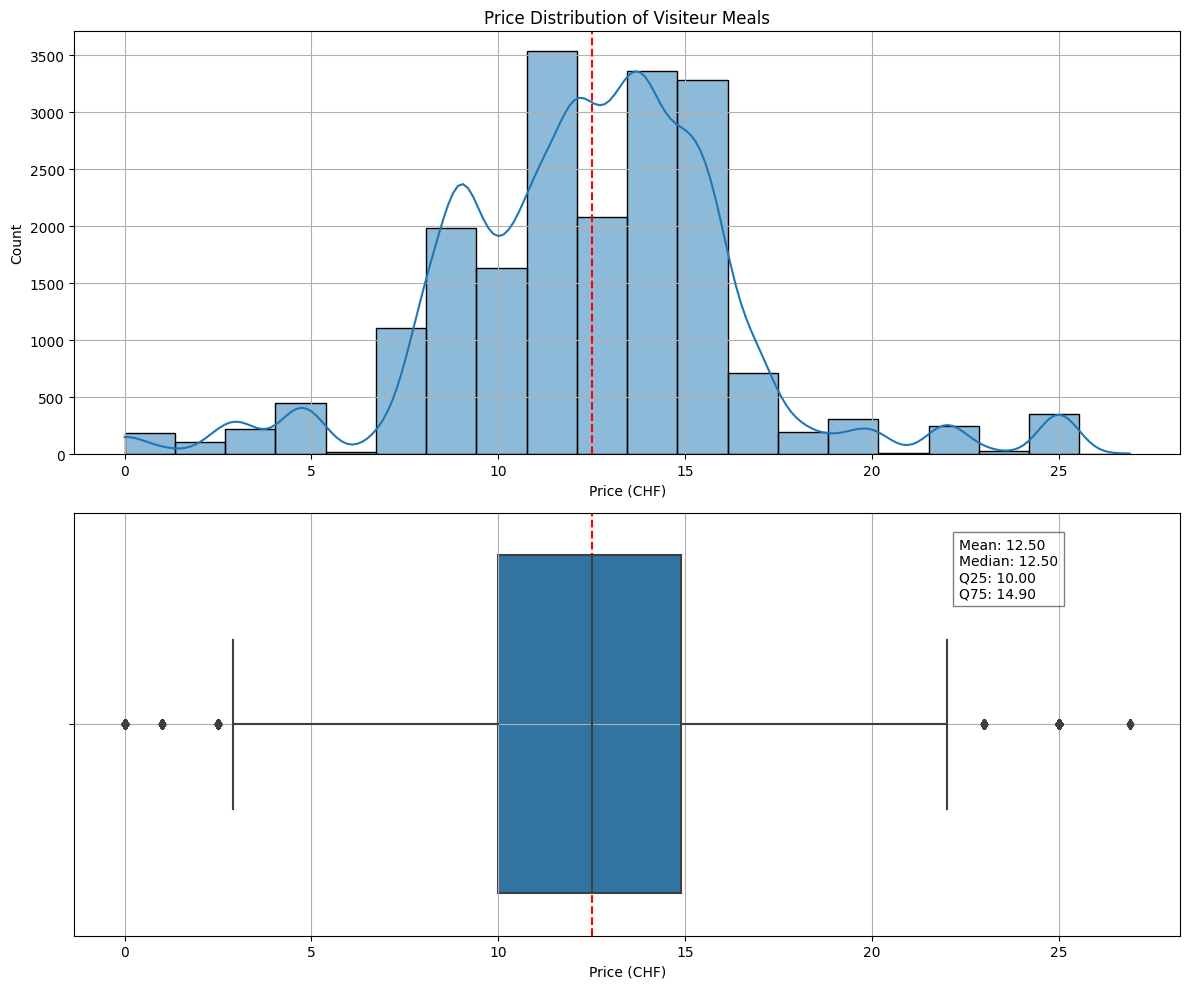

In [46]:
# Create a figure with subplots for the histogram and boxplot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=False)

visiteur_without_outliers = menus[menus['visiteur'] < 100]

# Calculate the statistics for etudiant meal prices
mean_visiteur_price = visiteur_without_outliers['visiteur'].mean()
median_visiteur_price = visiteur_without_outliers['visiteur'].median()
q25_visiteur_price = visiteur_without_outliers['visiteur'].quantile(0.25)
q75_visiteur_price = visiteur_without_outliers['visiteur'].quantile(0.75)

# Histogram for the price distribution of etudiant meals
sns.histplot(data=visiteur_without_outliers, x='visiteur', bins=20, kde=True, ax=ax1)
ax1.set_title("Price Distribution of Visiteur Meals")
ax1.set_ylabel("Count")
ax1.set_xlabel("Price (CHF)")
ax1.axvline(mean_visiteur_price, color='r', linestyle='--', label=f"Mean: {mean_visiteur_price:.2f}")
ax1.grid(True)

# Boxplot for the price distribution of etudiant meals
sns.boxplot(data=visiteur_without_outliers, x='visiteur', ax=ax2, orient='h')
ax2.set_xlabel("Price (CHF)")
ax2.axvline(mean_visiteur_price, color='r', linestyle='--', label=f"Mean: {mean_visiteur_price:.2f}")
statistics_text = f"Mean: {mean_visiteur_price:.2f}\nMedian: {median_visiteur_price:.2f}\nQ25: {q25_visiteur_price:.2f}\nQ75: {q75_visiteur_price:.2f}"
ax2.text(0.8, 0.8, statistics_text, transform=ax2.transAxes, bbox=dict(facecolor='white', alpha=0.5))
ax2.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

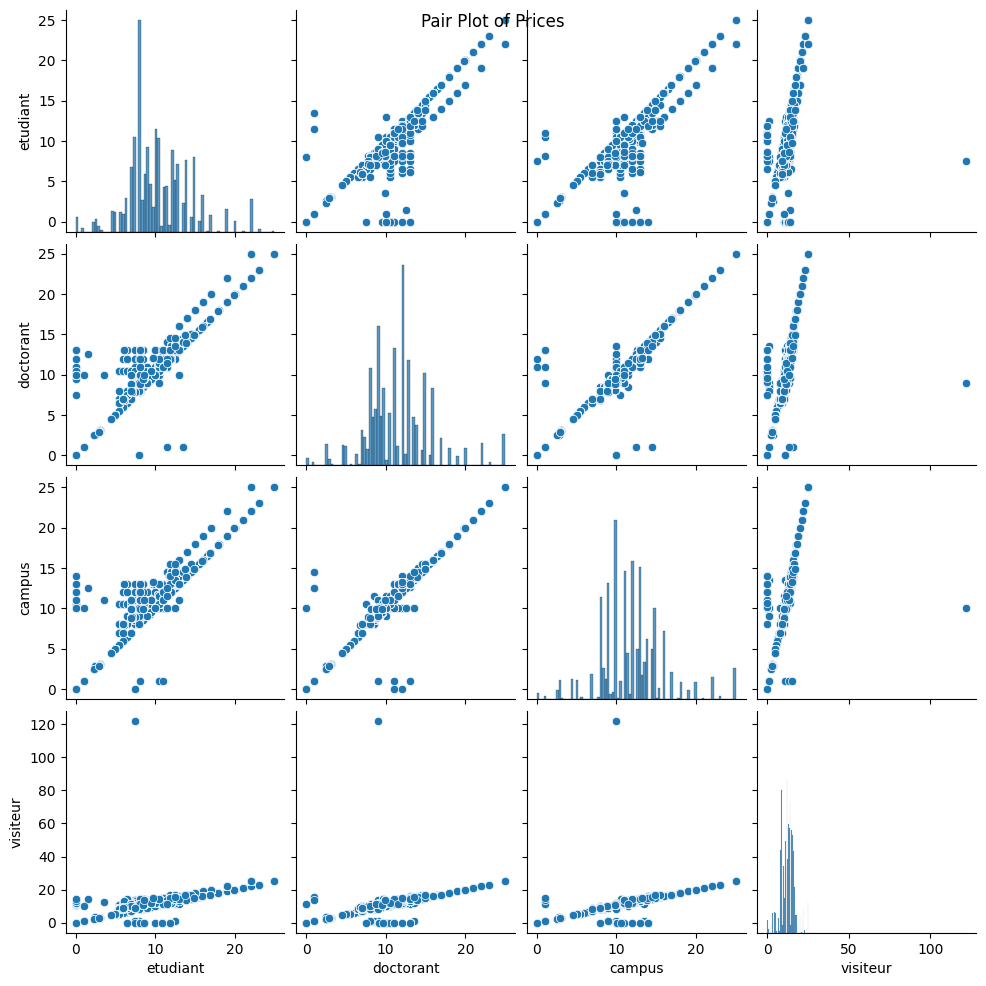

In [19]:
# Create a pair plot to visualize relationships between numerical variables
sns.pairplot(data=menus[['etudiant', 'doctorant', 'campus', 'visiteur']])
plt.suptitle("Pair Plot of Prices")
plt.show()